# Fantasy Football machine learning
Can we find which variables are important to give high points in FPL?

## Get the data from the FPL website

In [1]:
import urllib.request
import requests
import json
import pandas as pd

In [2]:
# Constants for accessing the website
FPL_URL = "https://fantasy.premierleague.com/drf/"
USER_SUMMARY_SUBURL = "element-summary/"
LEAGUE_CLASSIC_STANDING_SUBURL = "leagues-classic-standings/"
LEAGUE_H2H_STANDING_SUBURL = "leagues-h2h-standings/"
TEAM_ENTRY_SUBURL = "entry/"
PLAYERS_INFO_SUBURL = "bootstrap-static"


USER_SUMMARY_URL = FPL_URL + USER_SUMMARY_SUBURL
PLAYERS_INFO_URL = FPL_URL + PLAYERS_INFO_SUBURL
START_PAGE = 1

In [3]:
# Config constants

# Whether to save data locally or load from file
SAVE_DATA = 1

# Filename for the player data
PLAYERS_INFO_FILENAME = "allPlayersInfo2.json"

In [4]:
# Grab data
if SAVE_DATA == 1:
    r = requests.get(PLAYERS_INFO_URL)
    jsonResponse = r.json()
    with open(PLAYERS_INFO_FILENAME, 'w') as outfile:
        json.dump(jsonResponse, outfile)
else:
    with open(PLAYERS_INFO_FILENAME) as json_data:
        jsonResponse = json.load(json_data)

In [5]:
plyr_df = pd.DataFrame(data=jsonResponse['elements'])

In [6]:
plyr_df.columns

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'dreamteam_count', 'ea_index',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'id',
       'in_dreamteam', 'influence', 'loaned_in', 'loaned_out', 'loans_in',
       'loans_out', 'minutes', 'news', 'news_added', 'now_cost', 'own_goals',
       'penalties_missed', 'penalties_saved', 'photo', 'points_per_game',
       'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special',
       'squad_number', 'status', 'team', 'team_code', 'threat', 'total_points',
       'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_out_event', 'value_form', 'value_season', 'web_name',
       'yellow_cards'],
      dtype='object')

In [7]:
plyr_df.head()

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,cost_change_event,cost_change_event_fall,cost_change_start,...,threat,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
0,0,0,6,100.0,100.0,0,48844,0,0,-2,...,0.0,1,2084,48,8651,177,0.1,0.2,Ospina,0
1,0,4,477,100.0,75.0,9,11334,-1,1,-2,...,0.0,94,134394,838,251347,2869,0.4,17.7,Cech,1
2,0,0,0,0.0,0.0,0,98980,0,0,0,...,0.0,0,1410,22,27944,239,0.0,0.0,Martinez,0
3,0,16,511,100.0,100.0,9,51507,0,0,0,...,113.0,96,177385,2508,152078,4660,0.6,16.0,Koscielny,4
4,0,2,77,100.0,100.0,0,17127,0,0,-3,...,38.0,15,30194,200,44517,431,0.0,3.2,Mertesacker,0


In [8]:
phases_df = pd.DataFrame(data=jsonResponse['phases'])
phases_df.columns

Index(['id', 'name', 'start_event', 'stop_event'], dtype='object')

In [9]:
phases_df

,id,name,start_event,stop_event
0,1,Overall,1,38
1,2,August,1,3
2,3,September,4,7
3,4,October,8,10
4,5,November,11,14
5,6,December,15,21
6,7,January,22,25
7,8,February,26,28
8,9,March,29,32
9,10,April,33,36


## Analyse the data

In [10]:
num_players = plyr_df.shape[0]
print("There are {0} players in the dataframe".format(num_players))

There are 627 players in the dataframe


In [11]:
y = plyr_df.pop('total_points')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

TypeError: slice indices must be integers or None or have an __index__ method

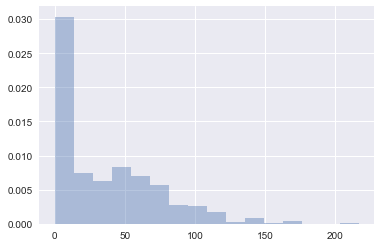

In [13]:
sns.distplot(y)

# Data cleansing

First, let's work with only the numeric variables

In [ ]:
trim_df = plyr_df._get_numeric_data()

In [ ]:
trim_df.describe()

In [ ]:
null_cols = trim_df.columns[trim_df.isnull().any()].tolist()
print(null_cols)
trim_df = trim_df.drop(null_cols, axis=1)
trim_df

In [ ]:
trim_df.describe()

Now we can split into training and testing data and fit a model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trim_df, y, test_size=0.7, random_state=42)

In [ ]:
from sklearn import tree

In [ ]:
model = tree.DecisionTreeRegressor()
model = model.fit(X_train, y_train)

In [ ]:
predicted_points = model.predict(X_test)

In [ ]:
plt.scatter(predicted_points,y_test)

In [ ]:
ft_imp = pd.DataFrame(X_train.columns.tolist(),model.feature_importances_)

In [ ]:
ft_imp

In [ ]:
team_df = pd.DataFrame(data=jsonResponse['teams'])
team_df.head()

In [ ]:
team_df.columns

In [14]:
next_game_df = pd.DataFrame(data=jsonResponse['next_event_fixtures'])
next_game_df.head()

,code,deadline_time,deadline_time_formatted,event,event_day,finished,finished_provisional,id,kickoff_time,kickoff_time_formatted,minutes,provisional_start_time,started,stats,team_a,team_a_score,team_h,team_h_score
0,919168,2018-02-24T11:30:00Z,24 Feb 11:30,28,1,False,False,276,2018-02-24T12:30:00Z,24 Feb 12:30,0,False,False,[],15,None,9,None
1,919163,2018-02-24T11:30:00Z,24 Feb 11:30,28,1,False,False,272,2018-02-24T15:00:00Z,24 Feb 15:00,0,False,False,[],13,None,2,None
2,919165,2018-02-24T11:30:00Z,24 Feb 11:30,28,1,False,False,273,2018-02-24T15:00:00Z,24 Feb 15:00,0,False,False,[],16,None,3,None
3,919166,2018-02-24T11:30:00Z,24 Feb 11:30,28,1,False,False,274,2018-02-24T15:00:00Z,24 Feb 15:00,0,False,False,[],14,None,4,None
4,919169,2018-02-24T11:30:00Z,24 Feb 11:30,28,1,False,False,277,2018-02-24T15:00:00Z,24 Feb 15:00,0,False,False,[],20,None,10,None


In [16]:
current_week = next_game_df['event'].head(1)
current_week[0]

28

In [47]:
plyr_df.columns

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'dreamteam_count', 'ea_index',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'id',
       'in_dreamteam', 'influence', 'loaned_in', 'loaned_out', 'loans_in',
       'loans_out', 'minutes', 'news', 'news_added', 'now_cost', 'own_goals',
       'penalties_missed', 'penalties_saved', 'photo', 'points_per_game',
       'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special',
       'squad_number', 'status', 'team', 'team_code', 'threat', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'yellow_cards'],
      dtype='object')

In [51]:
plyr_df[['web_name','event_points']]

,web_name,event_points
0,Ospina,0
1,Cech,4
2,Martinez,0
3,Koscielny,2
4,Mertesacker,0
5,Gabriel,0
6,Bellerín,2
7,Gibbs,0
8,Jenkinson,0
9,Monreal,2


In [52]:
plyr_df[plyr_df['web_name']=='Sterling']

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,cost_change_event,cost_change_event_fall,cost_change_start,...,team_code,threat,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
246,10,18,548,100.0,100.0,9,103955,0,0,10,...,43,1070.0,3222189,32741,1496596,46090,0.8,19.2,Sterling,2
599,0,0,0,NaN,NaN,0,199583,0,0,0,...,8,0.0,563,158,280,88,0.0,0.0,Sterling,0


In [28]:
r = requests.get("https://fantasy.premierleague.com/drf/element-summary/1")
jsonResponse = r.json()
with open('.json', 'w') as outfile:
    json.dump(jsonResponse, outfile)

In [29]:
history_df = pd.DataFrame(data=jsonResponse['history'])
history_df.columns

Index(['assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id', 'influence', 'key_passes',
       'kickoff_time', 'kickoff_time_formatted', 'loaned_in', 'loaned_out',
       'minutes', 'offside', 'open_play_crosses', 'opponent_team', 'own_goals',
       'penalties_conceded', 'penalties_missed', 'penalties_saved',
       'recoveries', 'red_cards', 'round', 'saves', 'selected', 'tackled',
       'tackles', 'target_missed', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'winning_goals', 'yellow_cards'],
      dtype='object')

In [30]:
history_df['round']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
Name: round, dtype: int64

In [31]:
history_df['id']

0         1
1       512
2      1028
3      1559
4      2103
5      2649
6      3199
7      3753
8      4310
9      4869
10     5432
11     5998
12     6567
13     7137
14     7708
15     8282
16     8859
17     9437
18    10017
19    10602
20    11188
21    11714
22    12366
23    12964
24    13567
25    14180
26    14805
Name: id, dtype: int64